In [91]:
import numpy as np

In [92]:
import pandas as pd

In [93]:
import seaborn as sns

In [94]:
import matplotlib.pyplot as plt

In [98]:
%matplotlib inline

In [276]:
df_result = pd.read_csv("result`data.csv")

In [277]:
df_result.head()

,card_number,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
0,4,2,2,1.00,14.05,unique,defeats,per goal,2024-08-01
1,4,3,1,1.00,7.81,unique,defeats,per goal,2024-08-01
2,3,1,2,1.00,15.77,unique,defeats,per goal,2024-08-01
3,5,3,2,1.00,16.88,unique,defeats,per goal,2024-08-01
4,4,4,0,1.57,8.61,unique,win,per goal,2024-08-01


In [101]:
df_result.tail()

,card_number,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
64,5,2,3,1.00,22.46,single,defeats,per win,2024-08-27
65,3,1,2,1.28,18.03,single,defeats,per win,2024-08-27
66,4,3,1,1.00,18.03,single,defeats,per win,2024-08-27
67,4,3,1,1.00,11.48,single,cashout(0.69),per win,2024-08-27
68,2,2,0,1.00,8.12,single,win,per win,2024-08-27


In [102]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
card_number       69 non-null int64
number_win        69 non-null int64
number_defeats    69 non-null int64
bet_value         69 non-null float64
win_value         69 non-null float64
card_type         69 non-null object
result            69 non-null object
bet_type          69 non-null object
date              69 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 4.9+ KB


In [103]:
df_result.describe()

,card_number,number_win,number_defeats,bet_value,win_value
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3.753623,2.144928,1.608696,1.004348,11.728261
std,1.743946,1.691461,1.003192,0.382259,9.749140
min,1.000000,0.000000,0.000000,0.500000,1.190000
25%,3.000000,1.000000,1.000000,0.950000,4.750000
50%,3.000000,2.000000,2.000000,1.000000,8.120000
75%,4.000000,3.000000,2.000000,1.000000,14.580000
max,10.000000,9.000000,4.000000,2.440000,51.740000


In [104]:
df_result.columns

Index(['card_number', 'number_win', 'number_defeats', 'bet_value', 'win_value',
       'card_type', 'result', 'bet_type', 'date'],
      dtype='object')

In [105]:
df_result['card_number'].head(2)

0    4
1    4
Name: card_number, dtype: int64

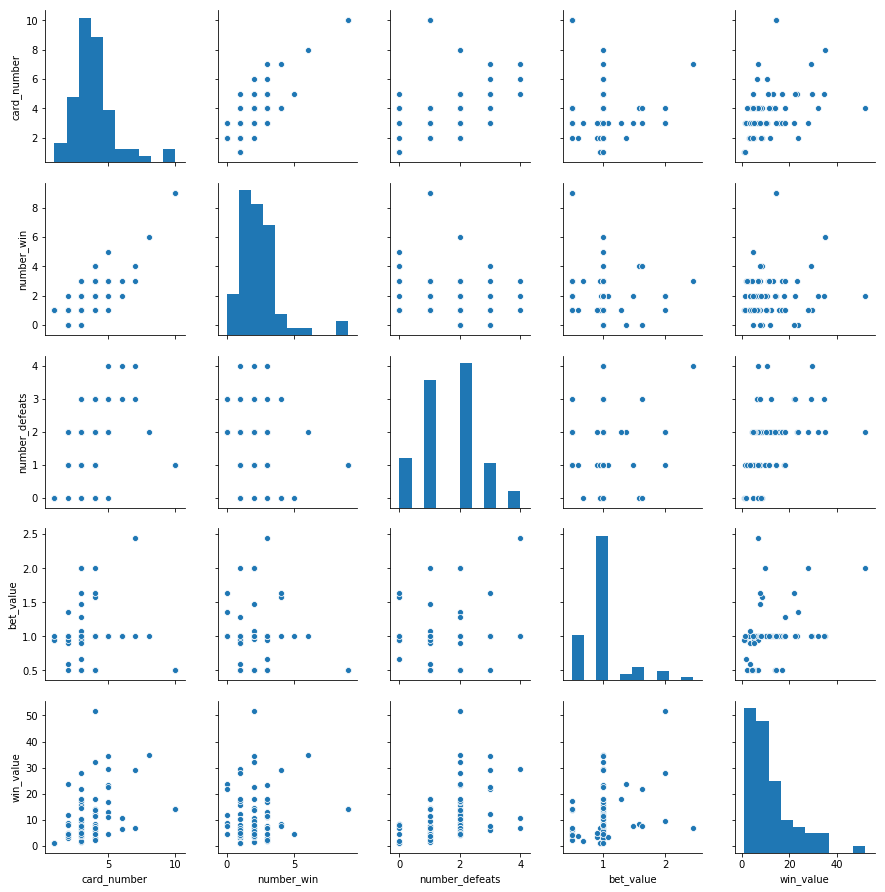

In [106]:
sns.pairplot(df_result)

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


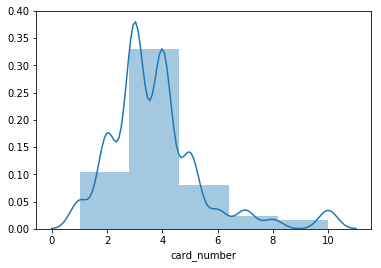

In [108]:
sns.distplot(df_result['card_number'], kde=True, bins=5)

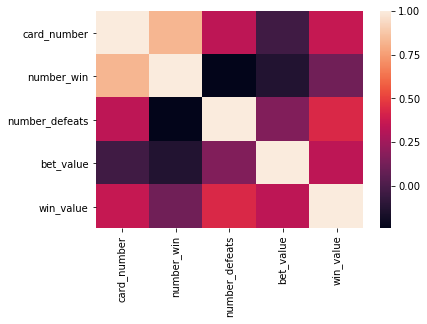

In [109]:
sns.heatmap(df_result.corr())

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


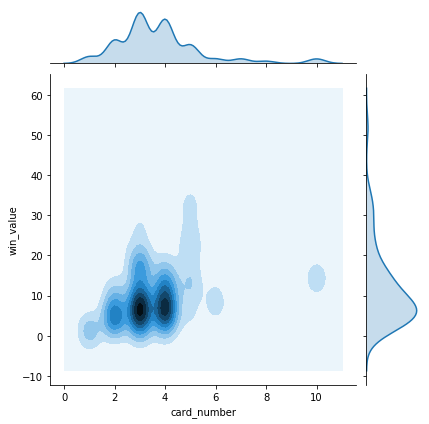

In [110]:
sns.jointplot(x='card_number', y='win_value', data=df_result, kind='kde')

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


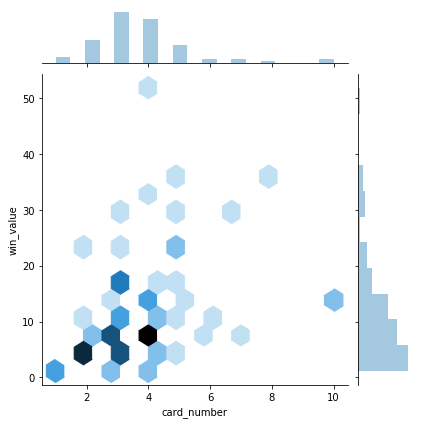

In [111]:
sns.jointplot(x='card_number', y='win_value', data=df_result, kind = "hex")

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/iva/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


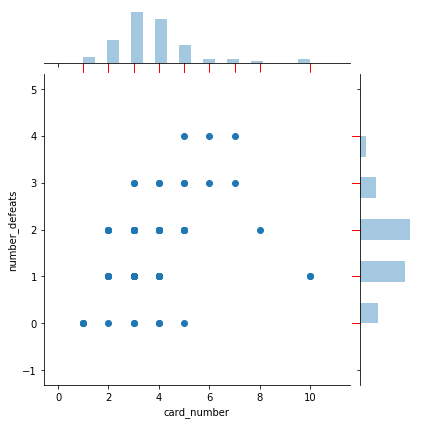

In [112]:
g = sns.jointplot(data=df_result, x='card_number', y='number_defeats')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

## K Means

In [232]:
df_means=df_result.iloc[:,[1,4]].values
df_means

array([[ 2.  , 14.05],
       [ 3.  ,  7.81],
       [ 1.  , 15.77],
       [ 3.  , 16.88],
       [ 4.  ,  8.61],
       [ 2.  , 51.74],
       [ 3.  , 23.22],
       [ 2.  ,  5.77],
       [ 3.  , 13.06],
       [ 2.  , 10.62],
       [ 3.  , 10.99],
       [ 3.  ,  6.48],
       [ 1.  , 12.12],
       [ 3.  , 11.62],
       [ 0.  ,  8.74],
       [ 0.  , 23.8 ],
       [ 2.  ,  7.6 ],
       [ 1.  ,  7.91],
       [ 1.  ,  6.93],
       [ 2.  , 32.12],
       [ 1.  , 29.42],
       [ 6.  , 35.02],
       [ 2.  , 34.31],
       [ 1.  , 10.44],
       [ 1.  ,  3.36],
       [ 4.  , 29.22],
       [ 0.  , 12.  ],
       [ 1.  ,  3.28],
       [ 2.  , 14.58],
       [ 2.  ,  9.79],
       [ 1.  , 27.96],
       [ 1.  , 10.19],
       [ 2.  , 17.85],
       [ 0.  , 21.93],
       [ 4.  ,  7.75],
       [ 5.  ,  4.63],
       [ 2.  ,  1.64],
       [ 3.  ,  2.94],
       [ 2.  ,  6.8 ],
       [ 3.  ,  7.03],
       [ 1.  ,  5.04],
       [ 1.  ,  1.24],
       [ 1.  ,  1.19],
       [ 1.

In [208]:
list_rcn = df_result[df_result.columns[0]].tolist()
array_rcn = np.array(list_rcn)
array_rcn

array([ 4,  4,  3,  5,  4,  4,  5,  3,  5,  6,  5,  6,  4,  4,  2,  2,  3,
        3,  3,  4,  5,  8,  5,  3,  2,  7,  2,  2,  3,  3,  3,  3,  3,  3,
        4,  5,  3,  4,  4,  7,  2,  1,  1,  1,  3,  4,  3,  3,  4,  2,  3,
        4,  2,  4,  4,  4,  3,  3,  3, 10,  4, 10,  3,  2,  5,  3,  4,  4,
        2])

In [209]:
list_rw = df_result[df_result.columns[1]].tolist()
array_rw = np.array(list_rw)
array_rw

array([2, 3, 1, 3, 4, 2, 3, 2, 3, 2, 3, 3, 1, 3, 0, 0, 2, 1, 1, 2, 1, 6,
       2, 1, 1, 4, 0, 1, 2, 2, 1, 1, 2, 0, 4, 5, 2, 3, 2, 3, 1, 1, 1, 1,
       3, 2, 2, 3, 3, 1, 2, 3, 1, 1, 3, 2, 1, 1, 1, 9, 2, 9, 0, 0, 2, 1,
       3, 3, 2])

In [210]:
list_rwv = df_result[df_result.columns[4]].tolist()
array_rwv = np.array(list_rwv)
array_rwv

array([14.05,  7.81, 15.77, 16.88,  8.61, 51.74, 23.22,  5.77, 13.06,
       10.62, 10.99,  6.48, 12.12, 11.62,  8.74, 23.8 ,  7.6 ,  7.91,
        6.93, 32.12, 29.42, 35.02, 34.31, 10.44,  3.36, 29.22, 12.  ,
        3.28, 14.58,  9.79, 27.96, 10.19, 17.85, 21.93,  7.75,  4.63,
        1.64,  2.94,  6.8 ,  7.03,  5.04,  1.24,  1.19,  1.27,  7.08,
        5.65,  3.42,  2.04,  4.46,  4.62,  3.69,  2.31,  3.68,  6.32,
        6.86,  4.75, 17.12,  4.22,  5.14, 14.35, 13.84, 14.35,  7.86,
        4.65, 22.46, 18.03, 18.03, 11.48,  8.12])

In [227]:
list_result=[df_means,array_rcn]
list_result[0][:,0]

array([2., 3., 1., 3., 4., 2., 3., 2., 3., 2., 3., 3., 1., 3., 0., 0., 2.,
       1., 1., 2., 1., 6., 2., 1., 1., 4., 0., 1., 2., 2., 1., 1., 2., 0.,
       4., 5., 2., 3., 2., 3., 1., 1., 1., 1., 3., 2., 2., 3., 3., 1., 2.,
       3., 1., 1., 3., 2., 1., 1., 1., 9., 2., 9., 0., 0., 2., 1., 3., 3.,
       2.])

In [228]:
list_result[0][:,1]

array([14.05,  7.81, 15.77, 16.88,  8.61, 51.74, 23.22,  5.77, 13.06,
       10.62, 10.99,  6.48, 12.12, 11.62,  8.74, 23.8 ,  7.6 ,  7.91,
        6.93, 32.12, 29.42, 35.02, 34.31, 10.44,  3.36, 29.22, 12.  ,
        3.28, 14.58,  9.79, 27.96, 10.19, 17.85, 21.93,  7.75,  4.63,
        1.64,  2.94,  6.8 ,  7.03,  5.04,  1.24,  1.19,  1.27,  7.08,
        5.65,  3.42,  2.04,  4.46,  4.62,  3.69,  2.31,  3.68,  6.32,
        6.86,  4.75, 17.12,  4.22,  5.14, 14.35, 13.84, 14.35,  7.86,
        4.65, 22.46, 18.03, 18.03, 11.48,  8.12])

In [229]:
list_result[1]

array([ 4,  4,  3,  5,  4,  4,  5,  3,  5,  6,  5,  6,  4,  4,  2,  2,  3,
        3,  3,  4,  5,  8,  5,  3,  2,  7,  2,  2,  3,  3,  3,  3,  3,  3,
        4,  5,  3,  4,  4,  7,  2,  1,  1,  1,  3,  4,  3,  3,  4,  2,  3,
        4,  2,  4,  4,  4,  3,  3,  3, 10,  4, 10,  3,  2,  5,  3,  4,  4,
        2])

In [157]:
from sklearn.datasets import make_blobs

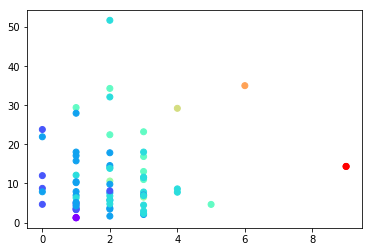

In [230]:
plt.scatter(list_result[0][:,0],list_result[0][:,1],c=list_result[1],cmap='rainbow')

In [233]:
from sklearn.cluster import KMeans

In [234]:
kmeans = KMeans(n_clusters=3)

In [235]:
kmeans.fit(df_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [238]:
kmeans.cluster_centers_

array([[ 1.87804878,  5.65682927],
       [ 2.52380952, 16.07285714],
       [ 2.57142857, 34.25571429]])

In [239]:
kmeans.labels_

array([1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0], dtype=int32)

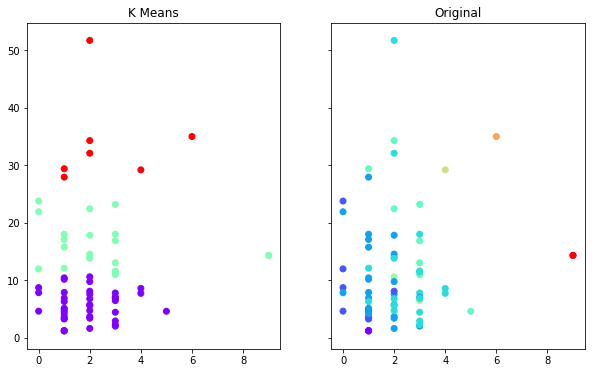

In [242]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(list_result[0][:,0],list_result[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(list_result[0][:,0],list_result[0][:,1],c=list_result[1],cmap='rainbow')

In [275]:
df_result.head(1)

,card_number,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
0,4,2,2,1.0,14.05,unique,defeats,per goal,2024-08-01


/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


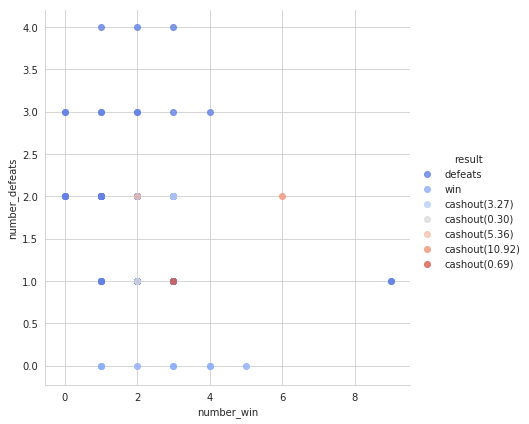

In [246]:
sns.set_style('whitegrid')
sns.lmplot('number_win','number_defeats',data=df_result, hue='result',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [291]:
filter_result = np.where((df_result['result'] == 'win') | (df_result['result'] == 'defeats'))

In [293]:
filter_result 

(array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68]),)

In [298]:
result=df_result.loc[filter_result]
result.head()

,card_number,number_win,number_defeats,bet_value,win_value,card_type,result,bet_type,date
0,4,2,2,1.00,14.05,unique,defeats,per goal,2024-08-01
1,4,3,1,1.00,7.81,unique,defeats,per goal,2024-08-01
2,3,1,2,1.00,15.77,unique,defeats,per goal,2024-08-01
3,5,3,2,1.00,16.88,unique,defeats,per goal,2024-08-01
4,4,4,0,1.57,8.61,unique,win,per goal,2024-08-01


/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


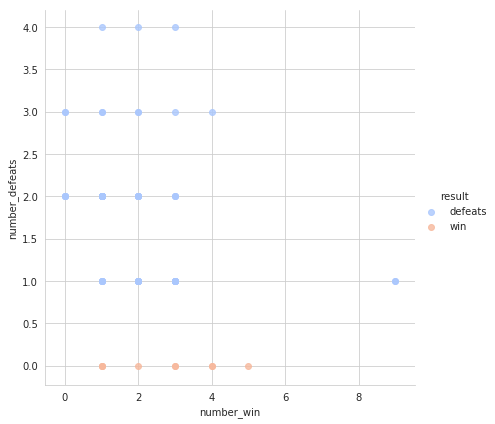

In [299]:
sns.set_style('whitegrid')
sns.lmplot('number_win','number_defeats',data=result, hue='result',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)